In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Use only 'Glucose' and 'BMI' as features
features = ['Glucose', 'BMI']
target = 'Outcome'

# Normalize features
for feature in features:
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.847771,72,35,0,0.203880,0.627,50,1
1,1,-1.122665,66,29,0,-0.683976,0.351,31,0
2,8,1.942458,64,0,0,-1.102537,0.672,32,1
3,1,-0.997558,66,23,94,-0.493721,0.167,21,0
4,0,0.503727,40,35,168,1.408828,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,-0.622237,76,48,180,0.115094,0.171,63,0
764,2,0.034575,70,27,0,0.609757,0.340,27,0
765,5,0.003299,72,23,112,-0.734711,0.245,30,0
766,1,0.159683,60,0,0,-0.240048,0.349,47,1


In [4]:
# Prepare feature matrix X and label vector y
X = df[features].values
y = df[target].values

# Add bias term (column of 1s)
X = np.hstack([np.ones((X.shape[0], 1)), X])
X

array([[ 1.        ,  0.84777132,  0.20387991],
       [ 1.        , -1.12266474, -0.68397621],
       [ 1.        ,  1.94245802, -1.10253696],
       ...,
       [ 1.        ,  0.00329872, -0.73471085],
       [ 1.        ,  0.15968254, -0.24004815],
       [ 1.        , -0.87245064, -0.20199718]])

In [5]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (Binary Cross-Entropy)
def compute_loss(X, y, weights):
    z = np.dot(X, weights)
    pred = sigmoid(z)
    loss = -np.mean(y * np.log(pred + 1e-10) + (1 - y) * np.log(1 - pred + 1e-10))
    return loss

# Train with Gradient Descent
def train(X, y, lr=0.1, epochs=100):
    weights = np.zeros(X.shape[1])
    losses = []

    for i in range(epochs):
        z = np.dot(X, weights)
        pred = sigmoid(z)

        # Compute gradient
        gradient = np.dot(X.T, (pred - y)) / len(y)

        # Update weights
        weights -= lr * gradient

        # Compute and store loss
        loss = compute_loss(X, y, weights)
        losses.append(loss)

        # Print progress
        print(f"Epoch {i+1}: Loss = {loss:.4f}")

    return weights, losses

def plot_decision_boundary(X, y, weights):
    # Only works with 2 features + bias
    x_min, x_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    y_min, y_max = X[:,2].min() - 0.5, X[:,2].max() + 0.5
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Generate input grid: add bias term of 1
    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    
    probs = sigmoid(np.dot(grid, weights)).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, cmap="RdBu")
    plt.colorbar(label="Predicted Probability")

    # Plot actual points
    plt.scatter(X[:,1], X[:,2], c=y, cmap="bwr", edgecolors='k')
    plt.xlabel("Glucose (normalized)")
    plt.ylabel("BMI (normalized)")
    plt.title("Decision Boundary")
    plt.grid(True)
    plt.show()

Epoch 1: Loss = 0.6841
Epoch 2: Loss = 0.6756
Epoch 3: Loss = 0.6676
Epoch 4: Loss = 0.6600
Epoch 5: Loss = 0.6528
Epoch 6: Loss = 0.6460
Epoch 7: Loss = 0.6396
Epoch 8: Loss = 0.6336
Epoch 9: Loss = 0.6279
Epoch 10: Loss = 0.6225
Epoch 11: Loss = 0.6174
Epoch 12: Loss = 0.6125
Epoch 13: Loss = 0.6079
Epoch 14: Loss = 0.6036
Epoch 15: Loss = 0.5994
Epoch 16: Loss = 0.5955
Epoch 17: Loss = 0.5918
Epoch 18: Loss = 0.5882
Epoch 19: Loss = 0.5849
Epoch 20: Loss = 0.5817
Epoch 21: Loss = 0.5786
Epoch 22: Loss = 0.5757
Epoch 23: Loss = 0.5729
Epoch 24: Loss = 0.5703
Epoch 25: Loss = 0.5678
Epoch 26: Loss = 0.5654
Epoch 27: Loss = 0.5631
Epoch 28: Loss = 0.5609
Epoch 29: Loss = 0.5588
Epoch 30: Loss = 0.5568
Epoch 31: Loss = 0.5549
Epoch 32: Loss = 0.5530
Epoch 33: Loss = 0.5513
Epoch 34: Loss = 0.5496
Epoch 35: Loss = 0.5480
Epoch 36: Loss = 0.5464
Epoch 37: Loss = 0.5449
Epoch 38: Loss = 0.5435
Epoch 39: Loss = 0.5421
Epoch 40: Loss = 0.5408
Epoch 41: Loss = 0.5396
Epoch 42: Loss = 0.5383
E

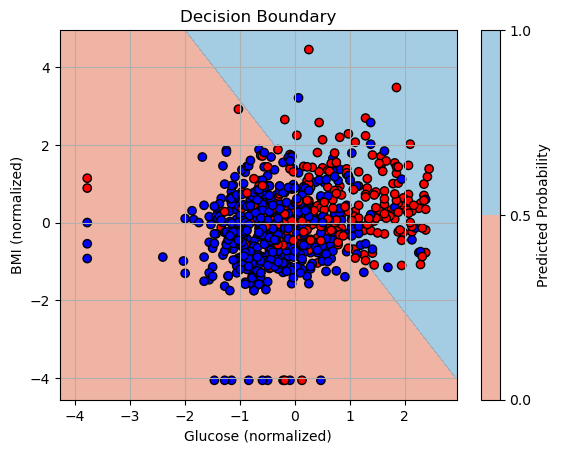

In [6]:
# Train the model
weights, losses = train(X, y, lr=0.1, epochs=100)

# Plot decision boundary
plot_decision_boundary(X, y, weights)

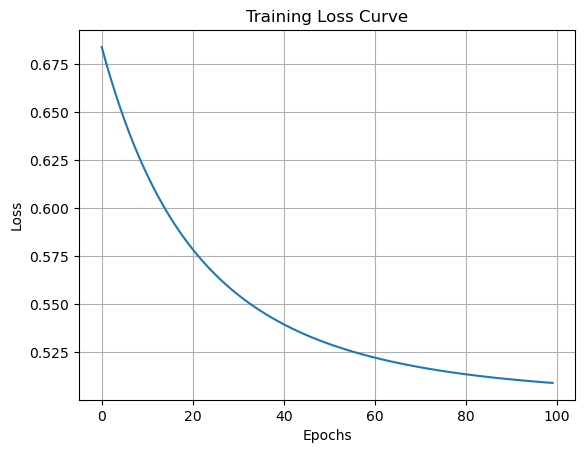

In [7]:
# Plot the loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

In [8]:
# Accuracy calculation
def accuracy(X, y, weights):
    preds = sigmoid(np.dot(X, weights))
    pred_labels = (preds >= 0.5).astype(int)
    acc = np.mean(pred_labels == y)
    return acc

# Evaluate accuracy
acc = accuracy(X, y, weights)
print(f"\nFinal Accuracy: {acc * 100:.2f}%")


Final Accuracy: 76.30%


In [9]:
# Predict on new input
def predict(glucose, bmi):
    # Normalize input using dataset stats
    glucose = (glucose - df['Glucose'].mean()) / df['Glucose'].std()
    bmi = (bmi - df['BMI'].mean()) / df['BMI'].std()
    
    input_vec = np.array([1, glucose, bmi])
    prob = sigmoid(np.dot(input_vec, weights))
    
    return "Diabetic" if prob >= 0.5 else "Not Diabetic", prob

# Example prediction
status, probability = predict(glucose=140, bmi=30)
print(f"\nPrediction: {status} (Probability: {probability:.2f})")


Prediction: Diabetic (Probability: 1.00)
